In [1]:
# data
import numpy as np
from sklearn.datasets import make_blobs, make_moons

#model
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

# visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

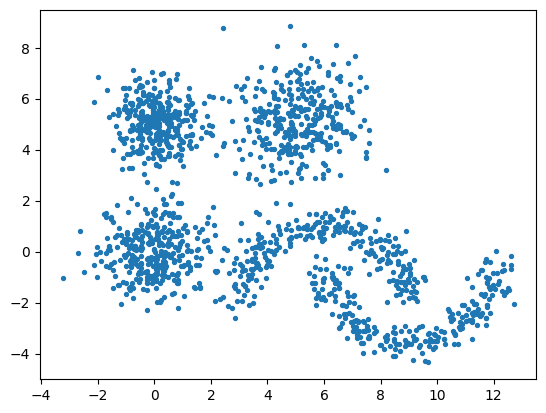

In [3]:
# data generation
X, y = make_blobs(n_samples=1000, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.8, 1.2], random_state=42)
moons = 3*make_moons(n_samples=500, noise=0.12, random_state=42)[0] + np.array([6, -2])

X = np.concatenate((X, moons), axis=0)

plt.scatter(X[:,0], X[:,1], s=8)
plt.show()

We will use the metric (averaged) silhouette_score to determine the best hyperparams of the model DBSCAN.
For a individual sample $i$, the silhouette_score is defined as:

\begin{equation}
silhouette\_score(i) = \frac{max(a_{i}, b_{i})}{b_{i}-a_{i}}
\end{equation}

where,
$a_{i}$: The average distance of $i$ to all other data points in the same cluster (intra-cluster distance)
$b_{i}$: The average distance of $i$ to all data points in the nearest cluster (inter-cluster distance).

Observations:
* A negative score indicates that the data point is likely assigned to the wrong cluster, as its distance to its assigned cluster’s points is greater than its distance to the nearest neighboring cluster’s points.
* A score close to 0 implies that the data point is on or very close to the decision boundary between two clusters. It indicates that the clustering is not well-defined and can be ambiguous.
* A positive score indicates that the data point is appropriately clustered. If close to +1, then the data point is well-clustered.


More information can be found here: https://www.educative.io/answers/what-is-silhouette-score

In [4]:
def evaluate_model(eps, min_samples):

    clusterer = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    #sample_silhouette_values = silhouette_samples(X, cluster_labels)

    return silhouette_avg

In [5]:
eps_values = np.arange(0.2, 0.8, 0.1)   # list from 0.2 to 0.8 in steps of 0.1
min_samples_values = range(2, 9)        # list from 2 to 8 in steps of 1

In [6]:
# calculate the averaged
data_points=[]
for eps in eps_values:
    for min_samples in min_samples_values:
        silhouette_avg = evaluate_model(eps, min_samples)
        data_points.append((round(eps, 1), min_samples, round(silhouette_avg, 5)))

In [7]:
# take a look to the 3D points (grid)
data_points

[(0.2, 2, 0.03736),
 (0.2, 3, -0.05277),
 (0.2, 4, -0.15753),
 (0.2, 5, -0.2852),
 (0.2, 6, -0.37442),
 (0.2, 7, -0.46906),
 (0.2, 8, -0.47582),
 (0.3, 2, -0.0939),
 (0.3, 3, -0.05048),
 (0.3, 4, 0.03459),
 (0.3, 5, 0.06851),
 (0.3, 6, 0.04825),
 (0.3, 7, 0.15051),
 (0.3, 8, 0.01911),
 (0.4, 2, 0.03339),
 (0.4, 3, 0.06118),
 (0.4, 4, 0.0652),
 (0.4, 5, 0.17894),
 (0.4, 6, 0.21621),
 (0.4, 7, 0.33448),
 (0.4, 8, 0.36018),
 (0.5, 2, 0.0445),
 (0.5, 3, 0.15198),
 (0.5, 4, 0.29266),
 (0.5, 5, 0.27382),
 (0.5, 6, 0.27291),
 (0.5, 7, 0.47027),
 (0.5, 8, 0.45735),
 (0.6, 2, -0.25307),
 (0.6, 3, 0.08177),
 (0.6, 4, 0.31434),
 (0.6, 5, 0.31317),
 (0.6, 6, 0.33513),
 (0.6, 7, 0.29952),
 (0.6, 8, 0.4082),
 (0.7, 2, 0.16263),
 (0.7, 3, 0.16263),
 (0.7, 4, 0.125),
 (0.7, 5, 0.125),
 (0.7, 6, 0.31541),
 (0.7, 7, 0.31284),
 (0.7, 8, 0.29541),
 (0.8, 2, 0.15846),
 (0.8, 3, 0.15846),
 (0.8, 4, 0.15846),
 (0.8, 5, 0.15846),
 (0.8, 6, 0.15846),
 (0.8, 7, 0.11503),
 (0.8, 8, 0.11503)]

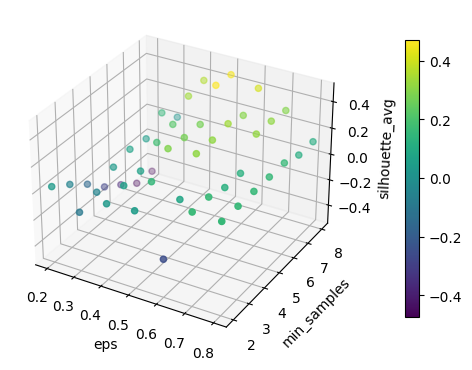

In [9]:
# make 3D scatter plot. Yellow points have higher silhouette_avg values
fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot(projection='3d')

x_values = [data_points[i][0] for i in range(len(data_points))]
y_values = [data_points[i][1] for i in range(len(data_points))]
z_values = [data_points[i][2] for i in range(len(data_points))]

p = ax.scatter(x_values, y_values, z_values, c=z_values, cmap="viridis")

ax.set_xlabel("eps")
ax.set_ylabel("min_samples")
ax.set_zlabel("silhouette_avg")

fig.colorbar(p, ax=ax, shrink=0.8, pad=0.12)
plt.show()

In [10]:
# select the index from the z_values list where silhouette_avg is maximum.
max_index = z_values.index(max(z_values))
x_ = x_values[max_index]
y_ = y_values[max_index]

print(f"the couple (eps, min_samples) that maximize the averaged silhouette_score is ({x_}, {y_})")

the couple (eps, min_samples) that maximize the averaged silhouette_score is (0.5, 7)


Now, we can train the DBSCAN model using the best hyperparams.

In [11]:
clusters = DBSCAN(eps=0.5,
                  min_samples=7,
                  n_jobs=-1).fit_predict(X)

In [12]:
# labels for clusters (and so, number of clusters)
np.unique(clusters)

array([-1,  0,  1,  2,  3,  4])

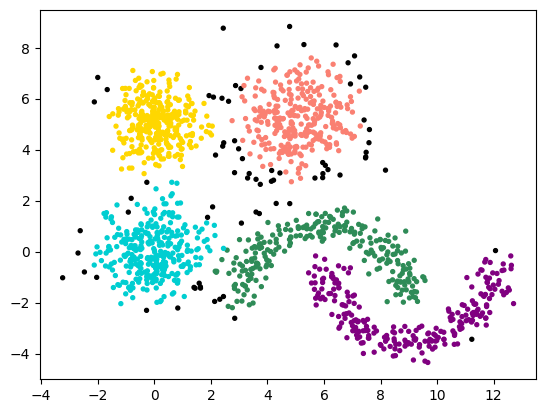

In [13]:
# make plot for the clusterized dataset
colors=['salmon', 'darkturquoise', 'gold', 'seagreen', 'purple']
point_color=[]

for row in clusters:
    if row == -1: point_color.append('black')  # noise and outliers
    else: point_color.append(colors[row])

plt.scatter(X[:, 0], X[:, 1], c=point_color, s=8)
plt.show()

<h3> Conclusion <h3>

We estimated the hyperparams (eps and min_samples) that maximizes silhouette_avg using a generated dataset. Finally, the clusterized distribution is shown. As comment, if we have a dataset with more than 2 features, then a dimensionality-reduction process can be carried out early.